## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 

In [2]:
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')
dataframe_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [3]:
dataframe_stdev.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

<Axes: >

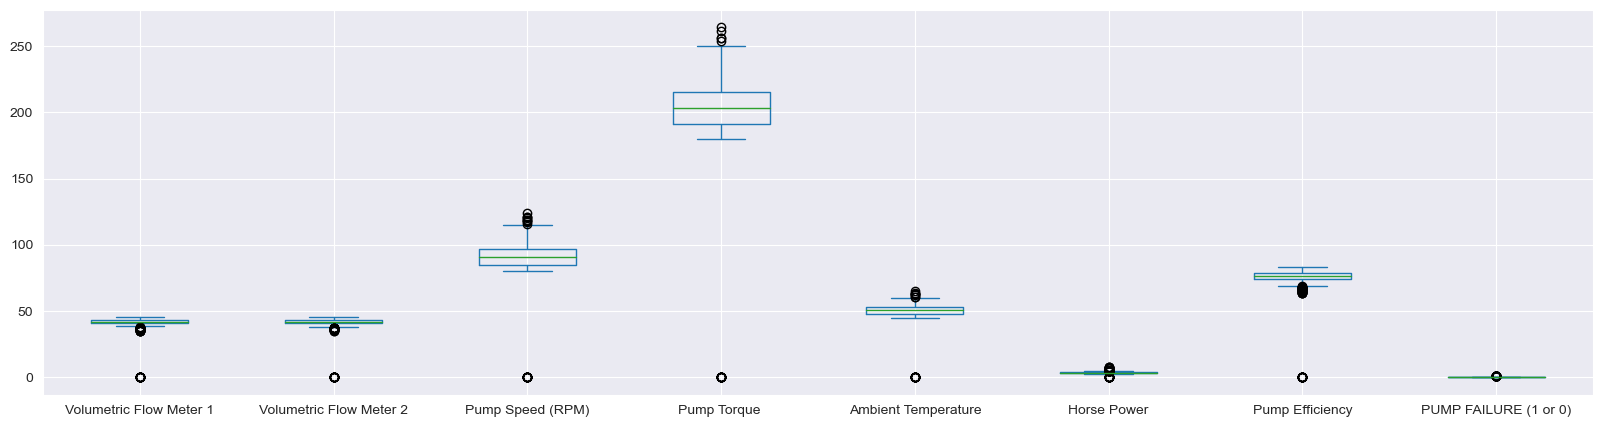

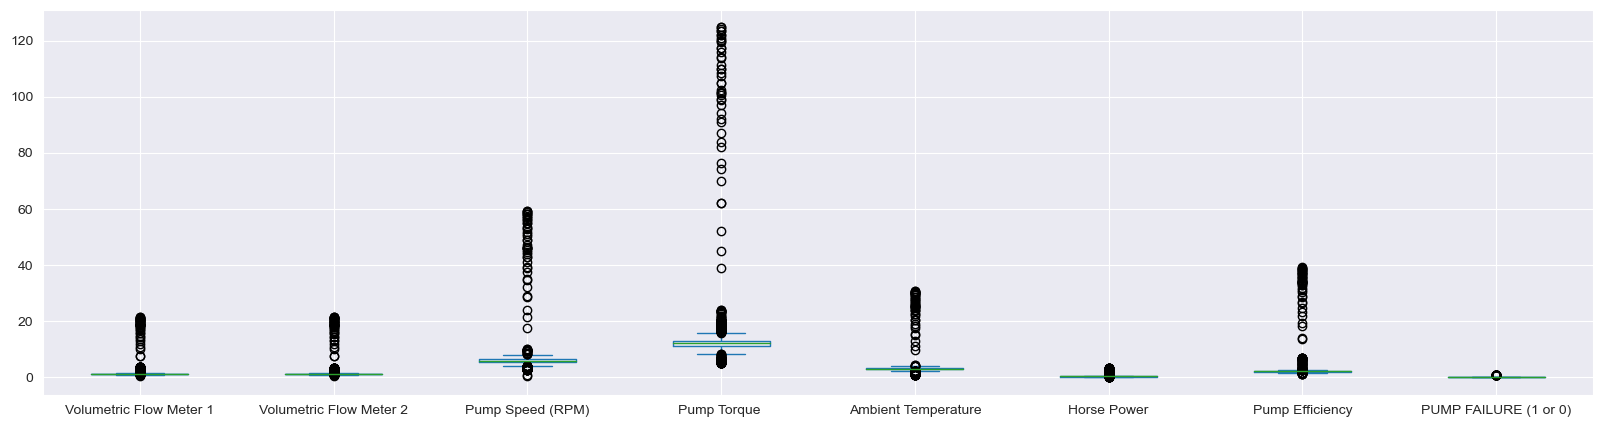

In [ ]:
dataframe_raw.plot(kind='box')
dataframe_stdev.plot(kind='box')
plt.show()

<Axes: >

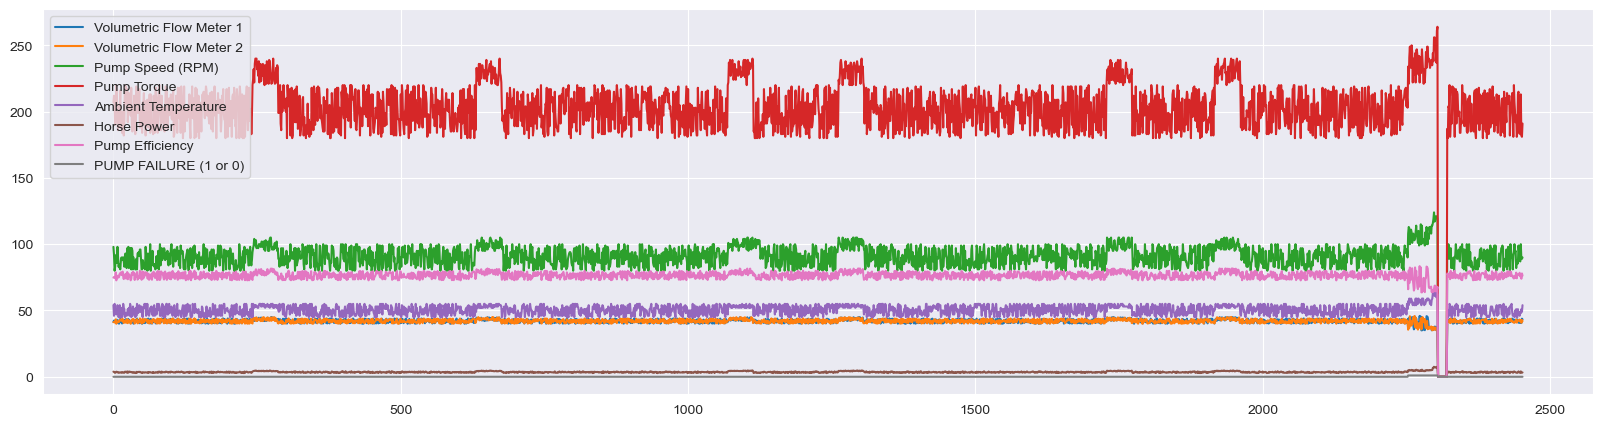

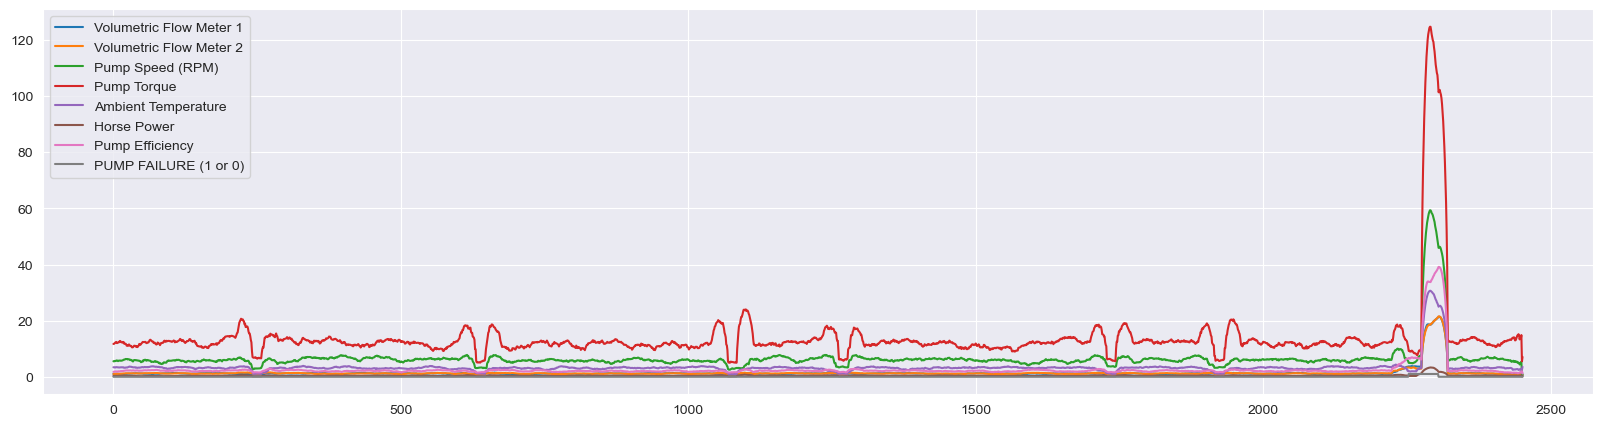

In [ ]:
dataframe_raw.plot(kind='line')
plt.legend(loc='upper left')
dataframe_stdev.plot(kind='line')
plt.show()

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered DataFrames with Box Plots</span> 

You would have noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the pump is failing (1) or whether the pump is behaving normally (0).  
    
It is very likely you will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, you should separate your datasets, filtering for when the Pump Failure = 0 or when the Pump Failure = 1, and see what trends emerge.



<Axes: title={'center': 'SD Fail = 1'}>

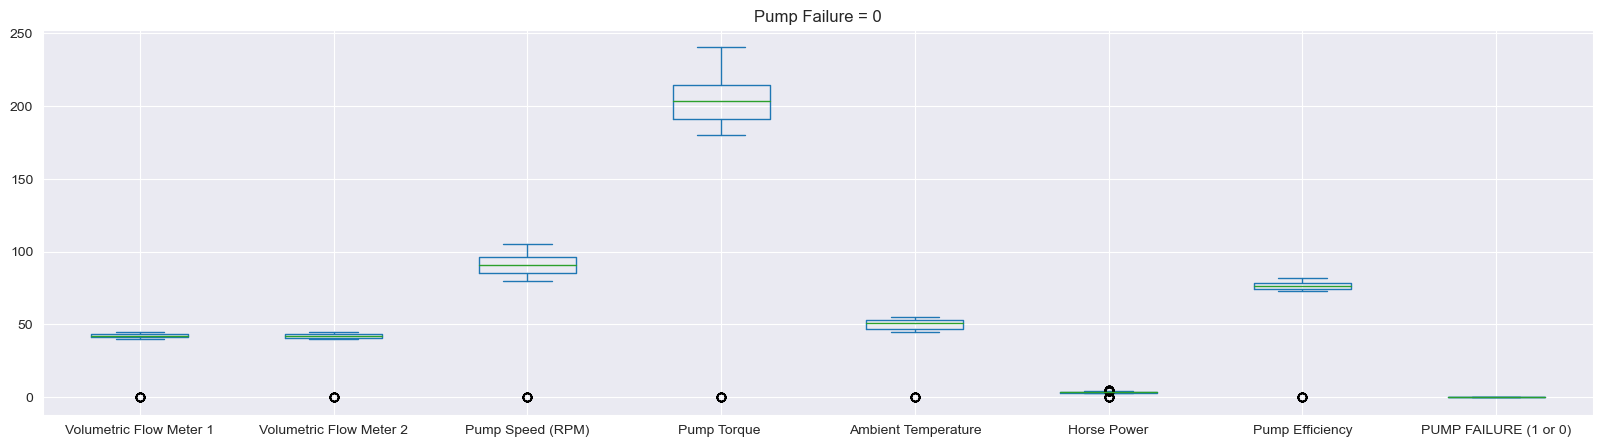

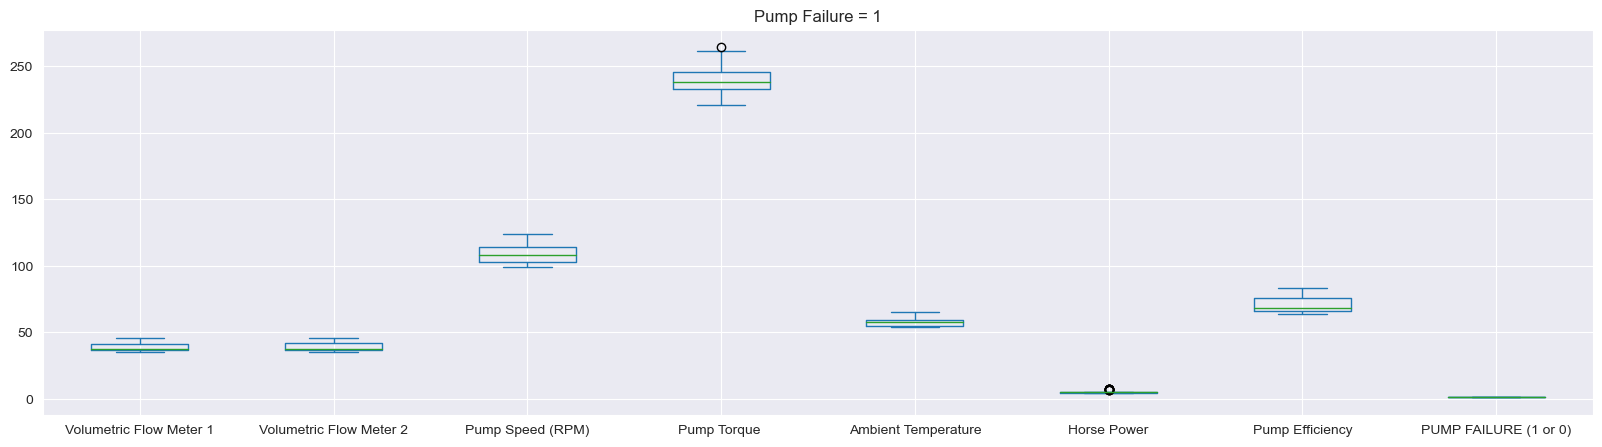

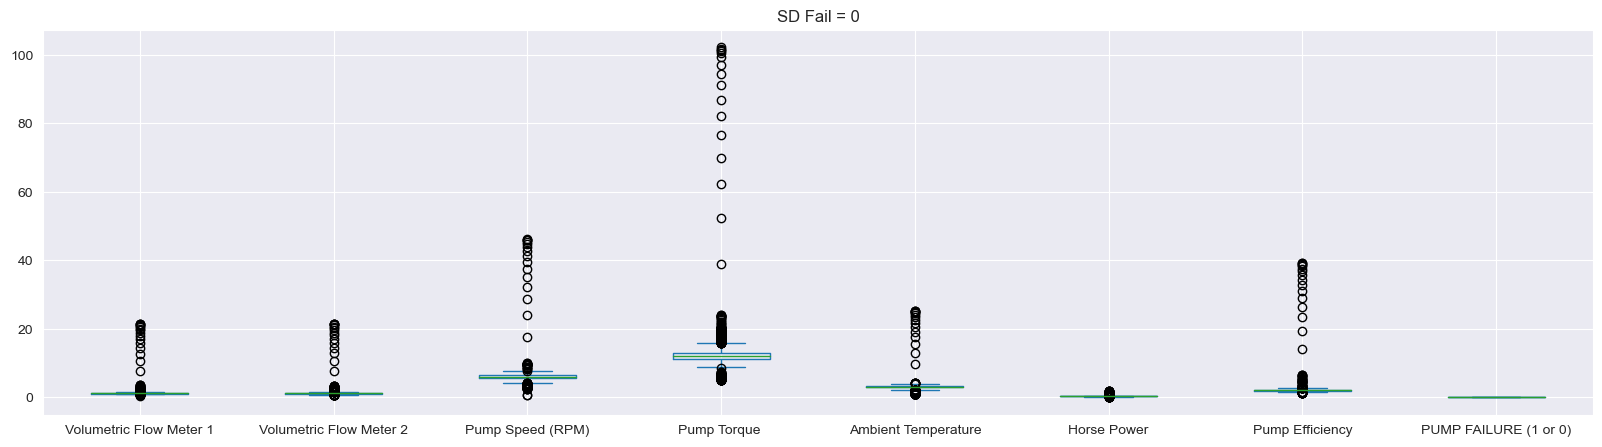

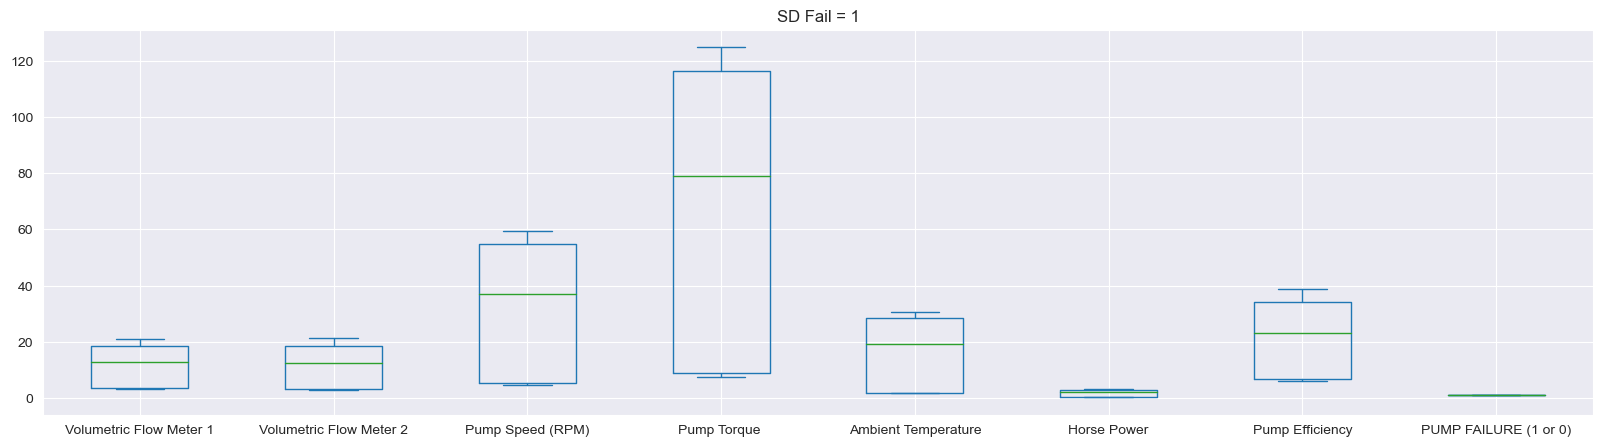

In [ ]:
condition_1 = dataframe_raw['PUMP FAILURE (1 or 0)'] == 0
condition_2 = dataframe_raw['PUMP FAILURE (1 or 0)'] == 1
condition_3 = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 0
condition_4 = dataframe_stdev['PUMP FAILURE (1 or 0)'] == 1
df_raw_0 = dataframe_raw[condition_1]
df_raw_1 = dataframe_raw[condition_2]
df_stdev_0 = dataframe_stdev[condition_3]
df_stdev_1 = dataframe_stdev[condition_4]
df_raw_0.plot(kind='box',title='Pump Failure = 0')
df_raw_1.plot(kind='box',title='Pump Failure = 1')
df_stdev_0.plot(kind='box',title='SD Fail = 0')
df_stdev_1.plot(kind='box',title='SD Fail = 1')
plt.show()

---------------------------------------------------------------------------

A quick analysis might show-case there are many *outliers* that exist in your dataset.

As you all know, outliers can easily *skew* your analysis. You might want to remove them.

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Let's break these down to a few simple steps and tackle how to calculate this.

1. Define the Quartiles Q1 and Q3. 
2. Calculate the Interquartile Range (Q3 - Q1)
3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
4. Using Boolean Subsetting, filter the DataFrame for outliers and remove them.
5. Calculate what the proportion of outliers exist (i.e. Number of entries left after outlier removal / Number of total entries in dataset). 


### Step 5: <span style="color:green">Create Quartiles</span> 

i)  <b> Q1 should contain the 25th percentile for all columns in the DataFrame. Q3 should contain the 75th percentile  for all the columns in the DataFrame.</b>

ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the DataFrame and print it to the screen.

In [ ]:
Q1 = dataframe_raw.quantile(.25, numeric_only=True)
Q3 = dataframe_raw.quantile(.75, numeric_only=True)
IQR = Q3 - Q1
IQR

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

Continuing in from Step 5 - we still need to calculate how we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

Now work out how to identify these outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 

When you use .any(axis=1) this indicates that for *any* entry in the columns that matches the criteria of being *less* than the lower limit or *greater* than the upper limit, for that column (axis=1), that row will be removed.
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the DataFrame to include *only* the outliers. How many outliers do we have?</b>
    

In [ ]:
Lower_Limit = Q1 - 1.5*IQR
Upper_Limit = Q3 + 1.5*IQR
Outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]
len(Outliers)

C:\Users\Tanner Test\AppData\Local\Temp\ipykernel_15444\145747068.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]


95

---------------------------------------------------------------------------

In the previous exercise, we've showed you how to calculate outliers. Now you want to remove *all* the outliers in your dataset and create box plots to see how the data looks without outliers.  

<b> We're now going to add one symbol that will help you return a dataframe with 0 Outliers. This is the ~ Symbol. </b>

Essentially this Symbol tells Python to 'invert' the current boolean Value from True, to False.


### Step 7: <span style="color:green">Create a box plot without outliers</span> 

i) Create a new DataFrame called no_outliers and using the ~ operator, remove all the outliers from the DataFrame <p>
ii) Using the no_outliers dataframe, create two box plots as per below: <p>
    <li> A boxplot when PUMP FAILURE is 1 (Failure) </li>
    <li> A boxplot when PUMP FAILURE is 0 (Normal Behaviour) </li> 


C:\Users\Tanner Test\AppData\Local\Temp\ipykernel_15444\2888493970.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw[~(((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1))]


<Axes: title={'center': 'Pump Failure = 1'}>

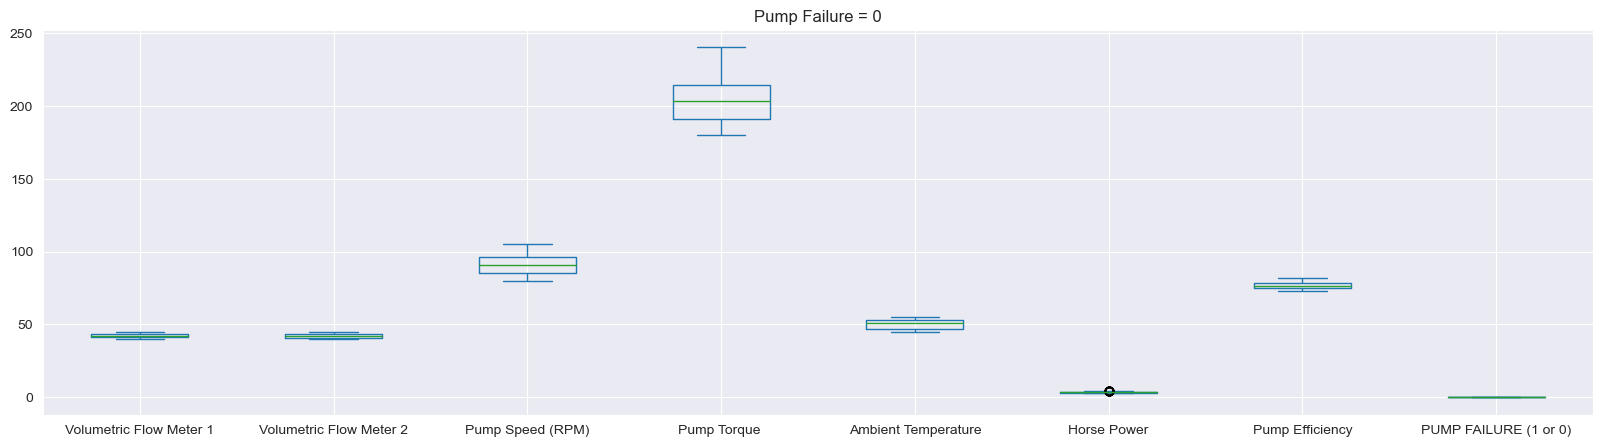

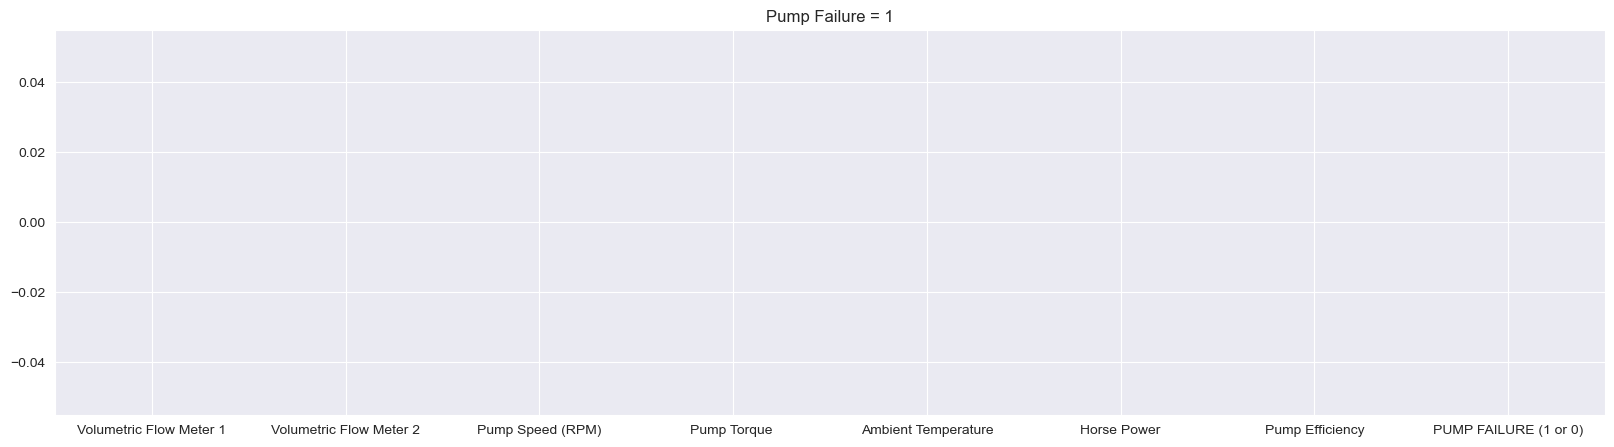

In [ ]:
no_outliers = dataframe_raw[~(((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1))]
no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0].plot(kind='box',title='Pump Failure = 0')
no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1].plot(kind='box',title='Pump Failure = 1')
plt.show()

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to ITERATE through the DataFrame, plot each individual variable out, and compare this with the Pump Failure for a more streamlined analysis.

This will require you to make use of the following syntax:

1. Define a list variable called ListOfVariables; this is to contain the column names of all the **numerical** variables you wish to iterate through in the dataframe_raw dataset <p>

2. Instantiate your for loop with the following syntax: 
       
    
    for item in ListOfVariables:
        first_axis = dataframe[___].plot #Looping through every item in the dataframe.
        second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
        second_axis.plot(dataframe['ColumnOfInterest'], color='teal')
        plt.title(item)
        plt.show()
        
<b> i) Using the syntax provided, loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends. </b>


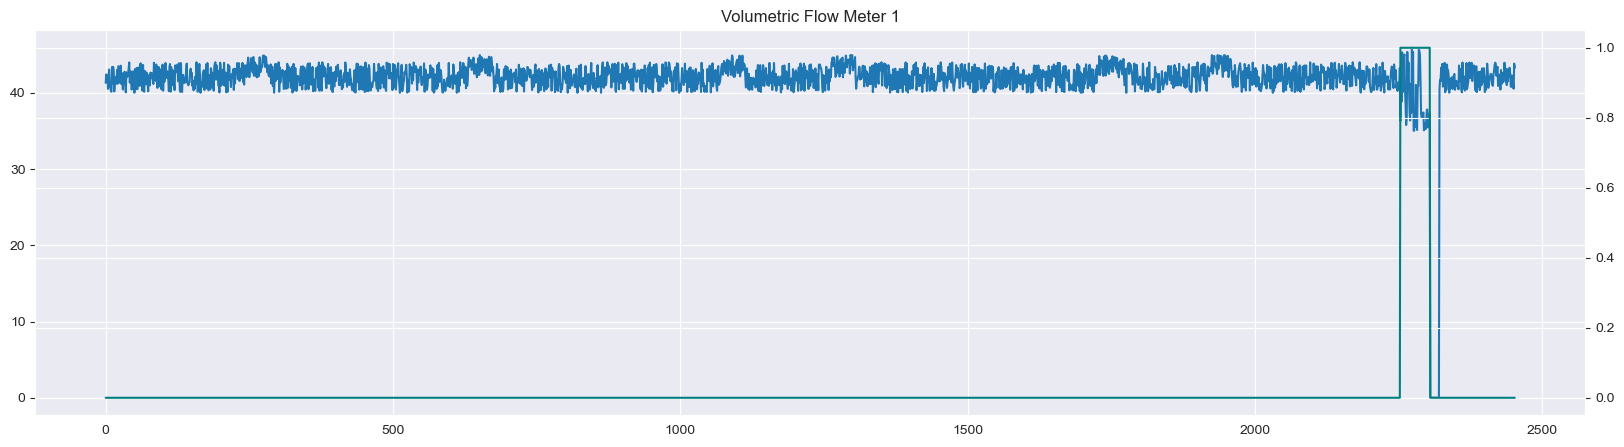

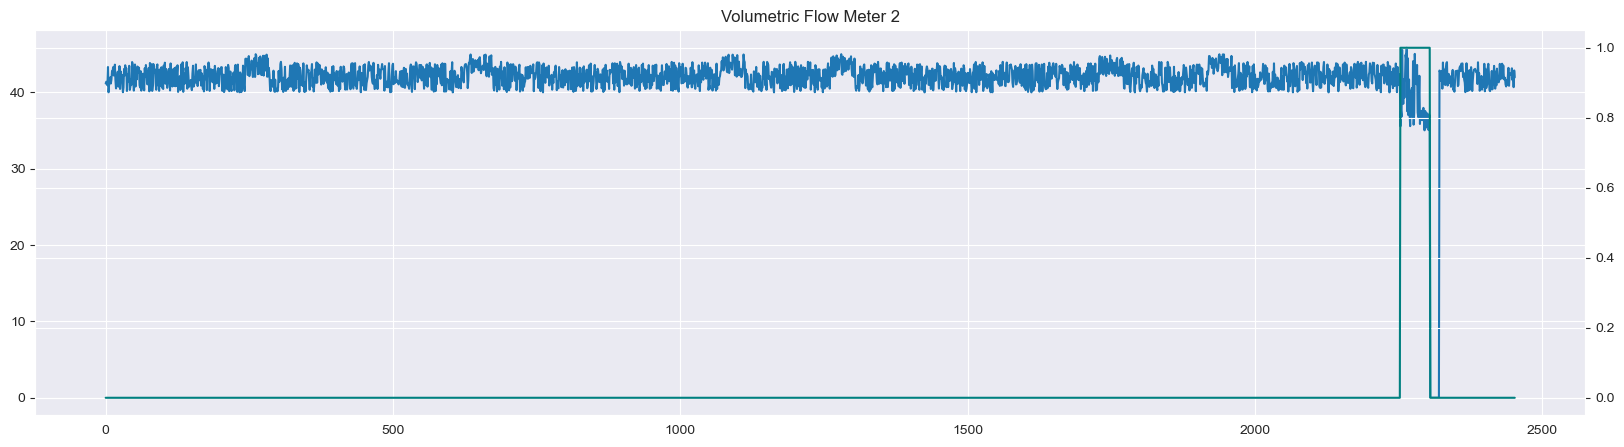

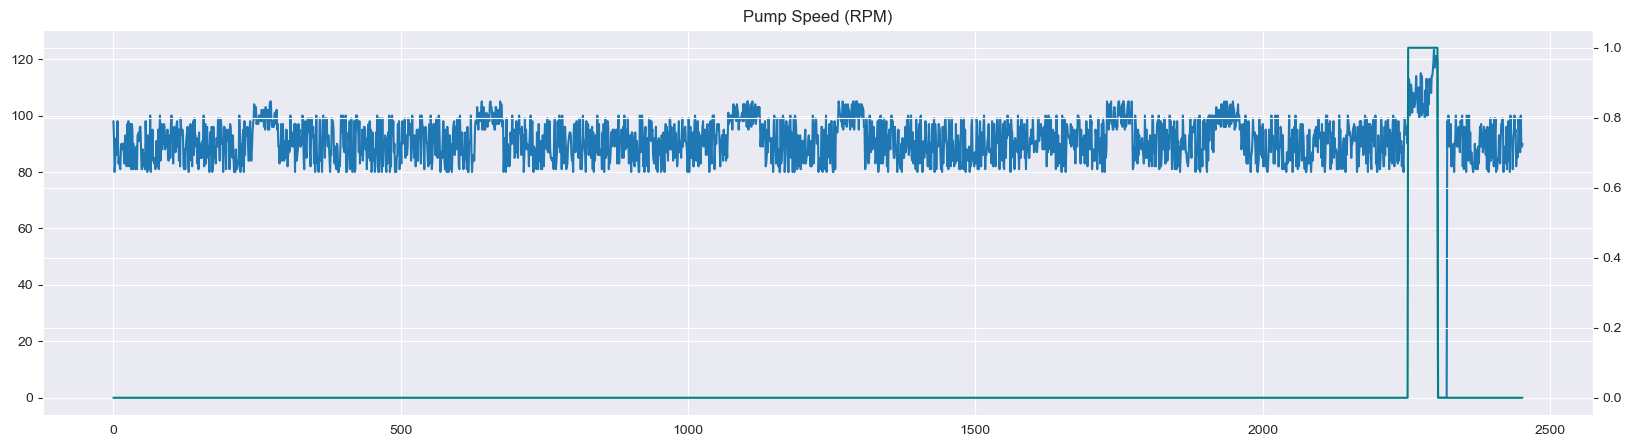

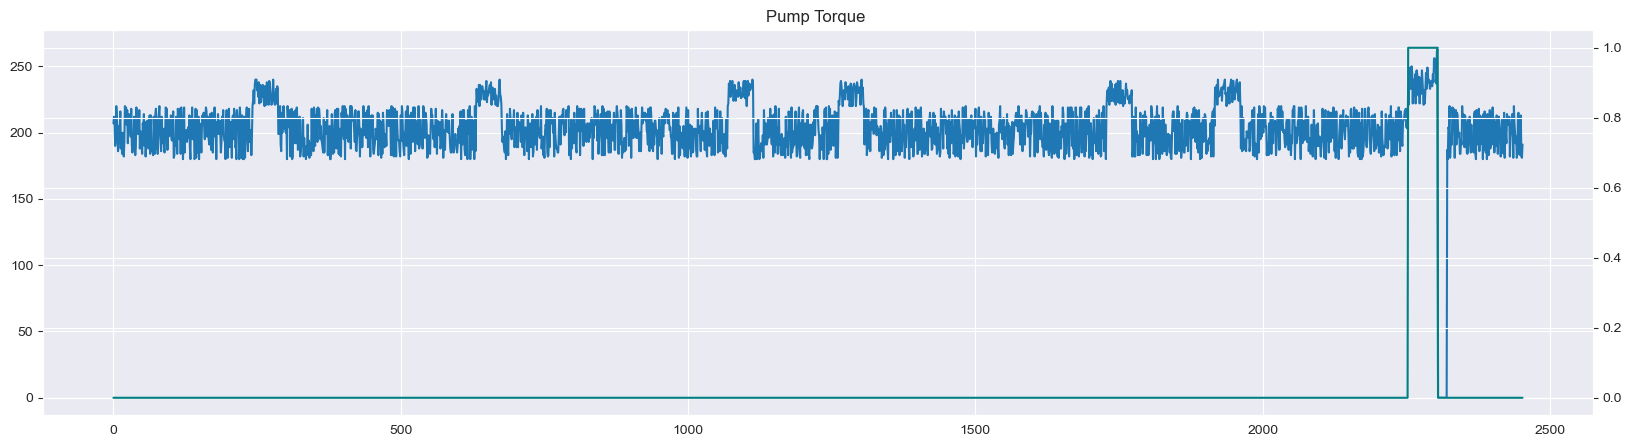

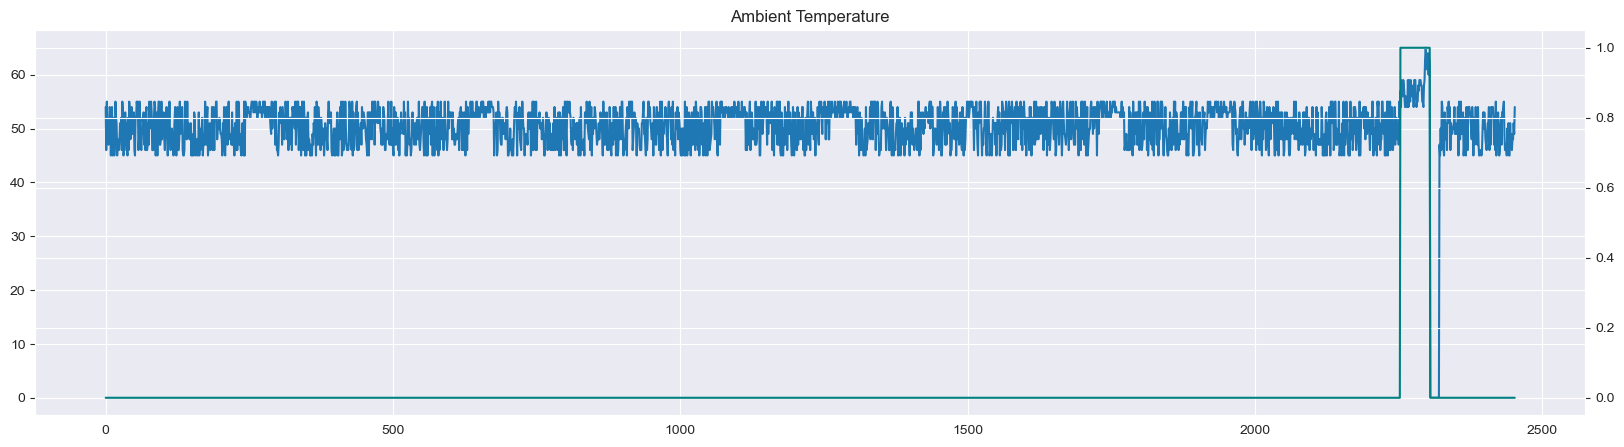

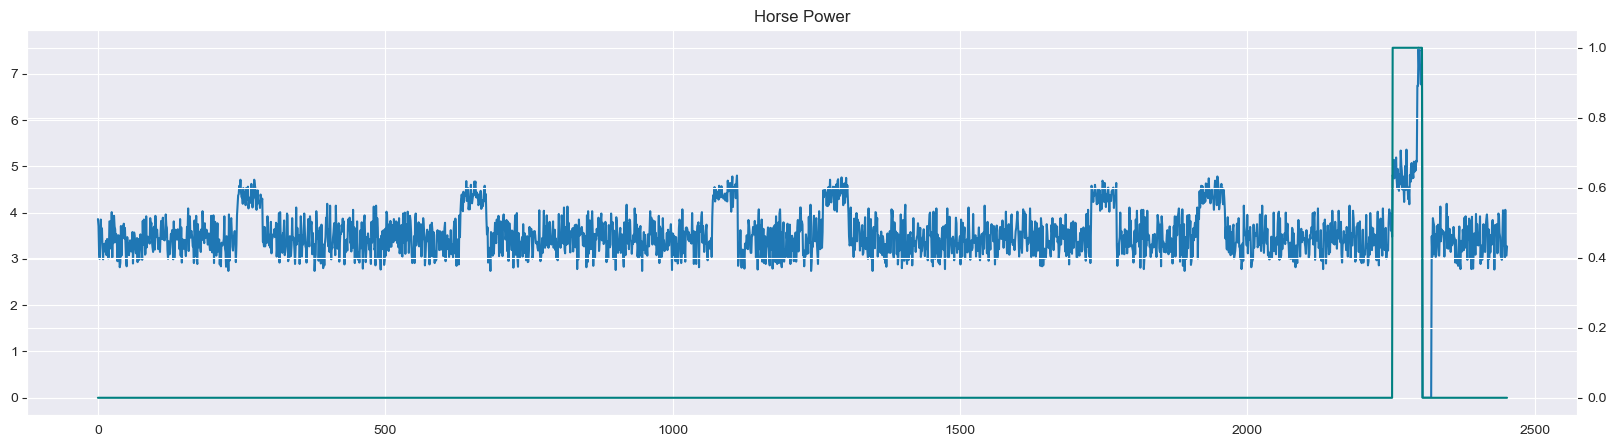

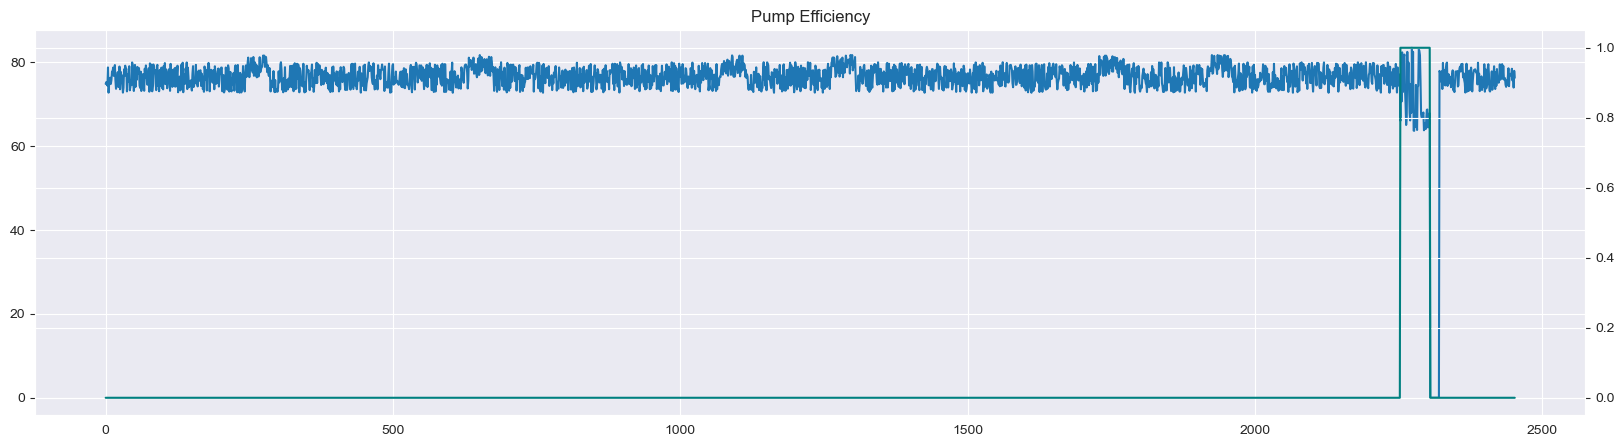

In [ ]:
ListOfVariables = ['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']
for item in ListOfVariables: 
    ax = dataframe_raw[item].plot()
    ax2 = ax.twinx()
    ax2.plot(dataframe_raw['PUMP FAILURE (1 or 0)'],color='teal')
    plt.title(item)
    plt.show()

---

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev that you had previously defined in Q1, dataframe_stdev </span> </h3>

Now that you've iterated through the dataframe_raw, we're going to do something similar with the dataframe_stdev dataset.

In these next few exercises you'll be seeking to better understand how to make use of Pythons Powerful Inferential Statistics and Plotting libraries to Zoom In on periods of interest that you'd like to examinate further.

First, prepare the DataFrame with the TIMEFRAME (DD/MM/YYYY) column set as the index.


### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index of the dataframe_stdev** dataset to the TIMEFRAME (DD/MM/YYYY) attribute.

ii) Using the List_Of_Variables you created in Step 8, Re-plot all the numerical variables in the dataframe_stdev for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.

<b>Note: To filter on the time period you will need to make use of the below syntax which *should* be familiar to you as you are subsetting your DataFrame, but instead of on a column, you're subsetting a time period. </b>

    dataframe_time_filtered = dataframe[(dataframe.index >= "_____") & (dataframe.index <= "_____")]


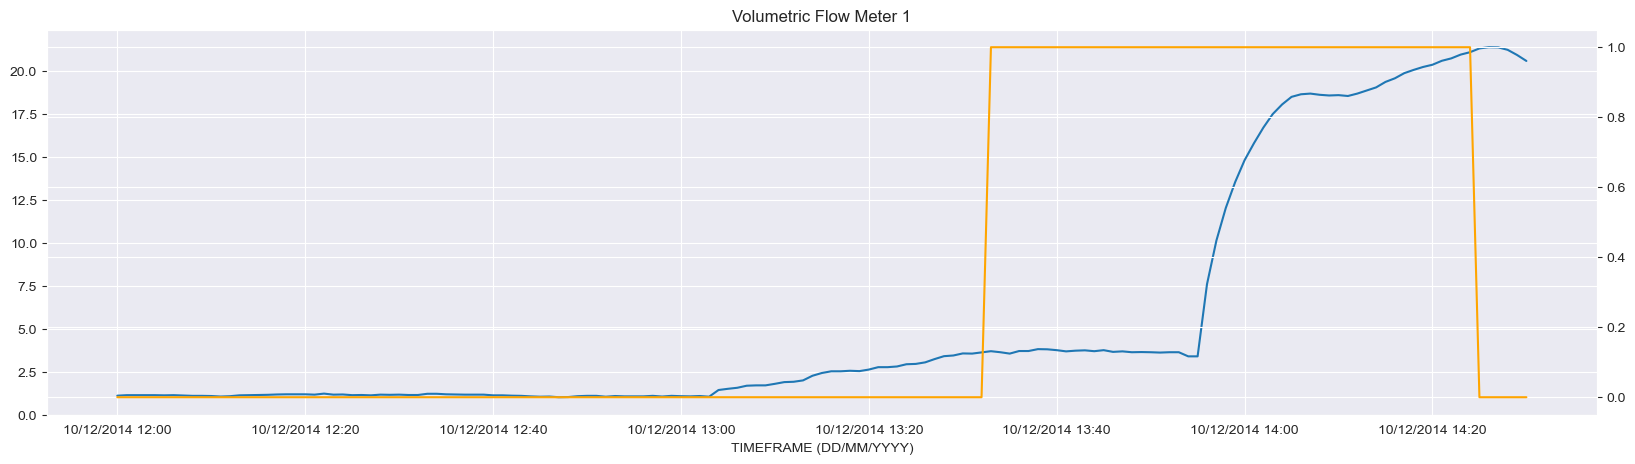

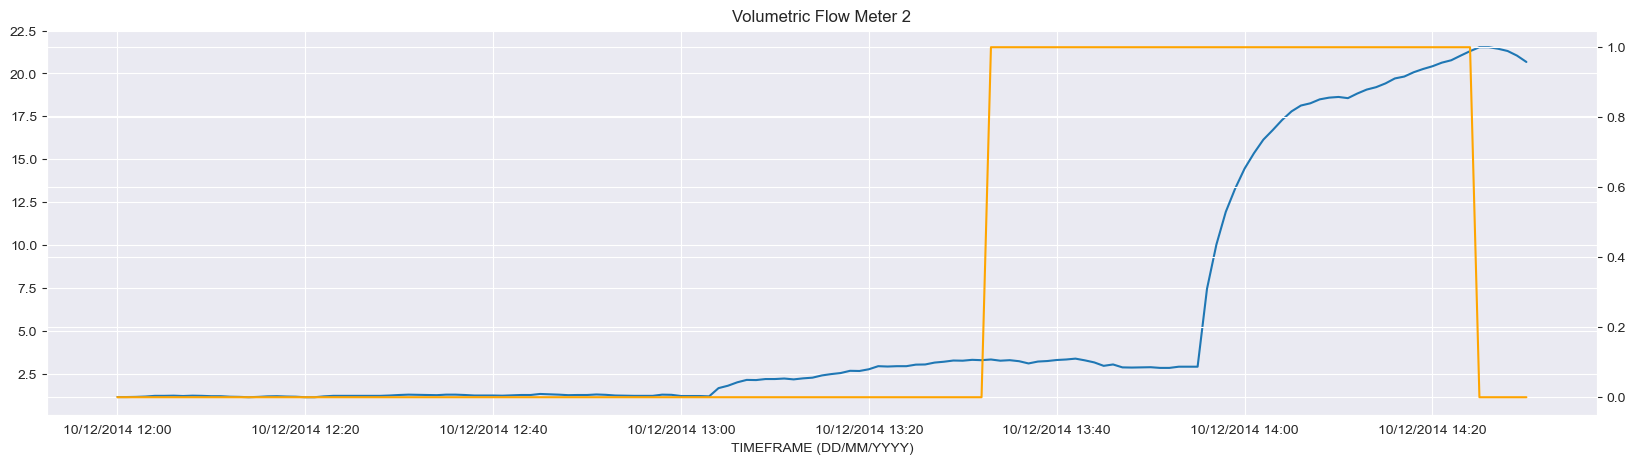

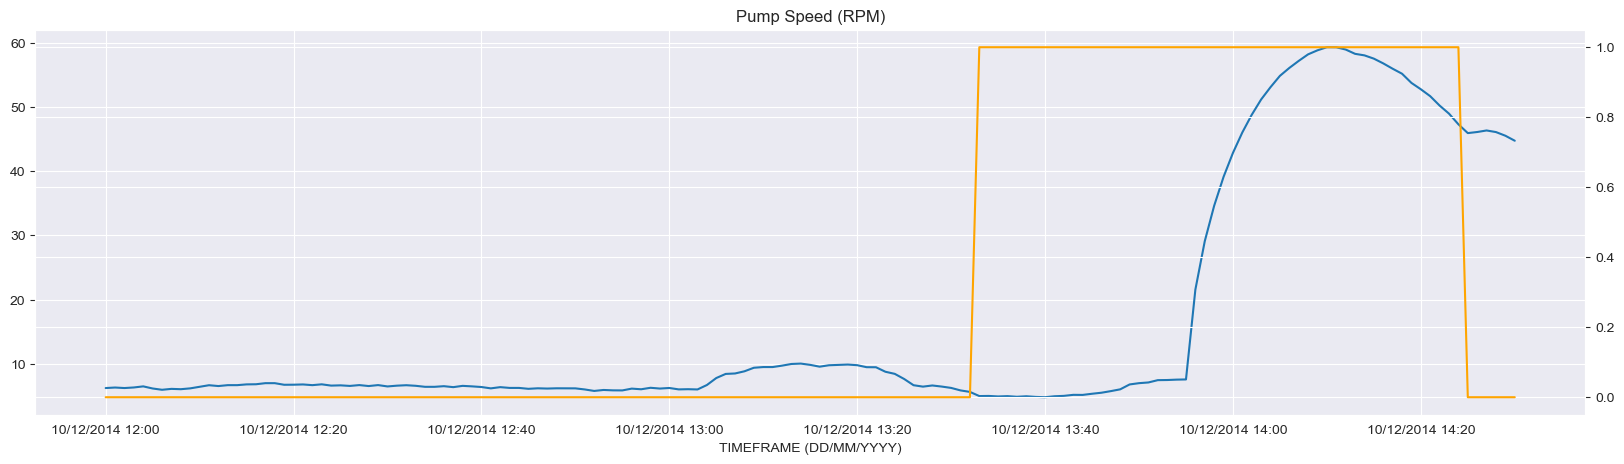

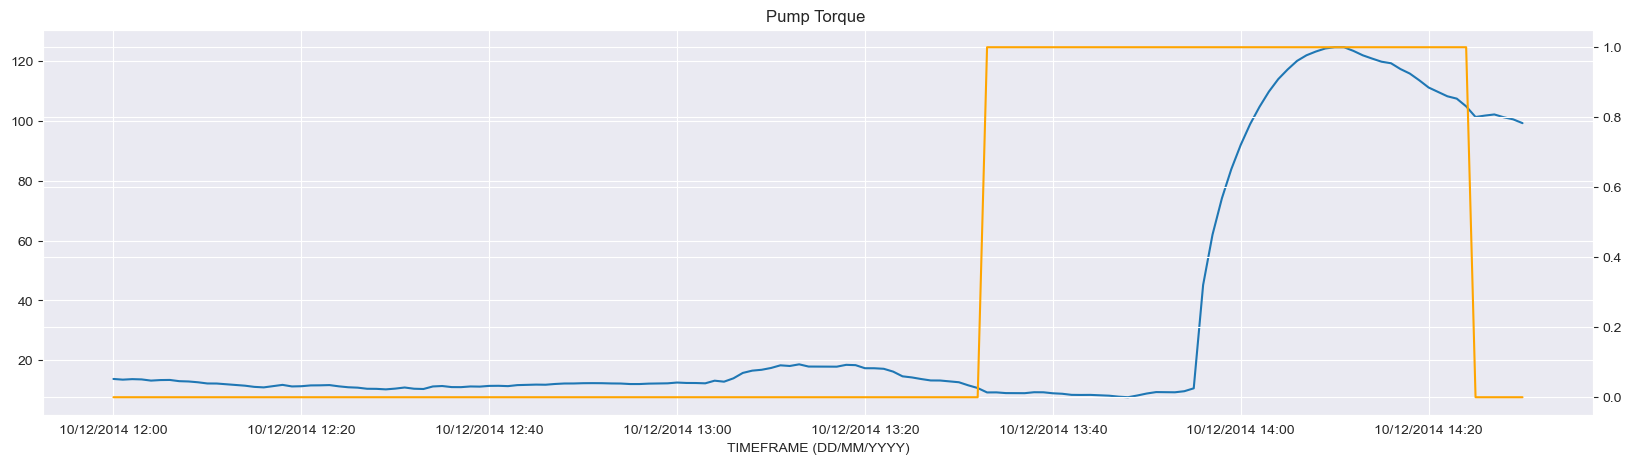

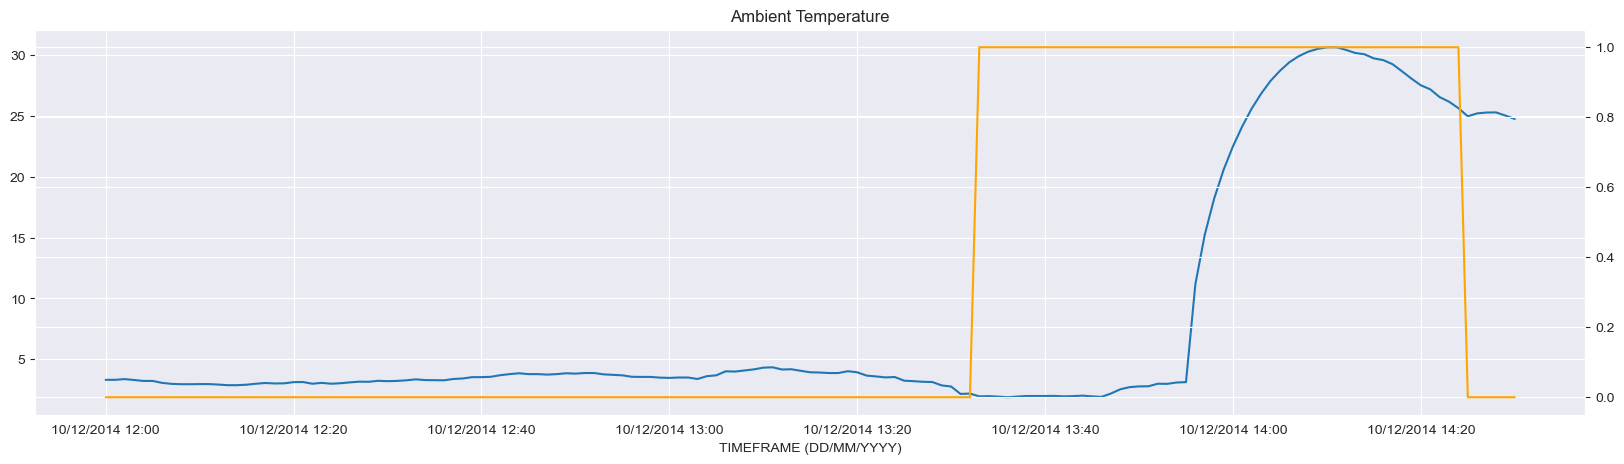

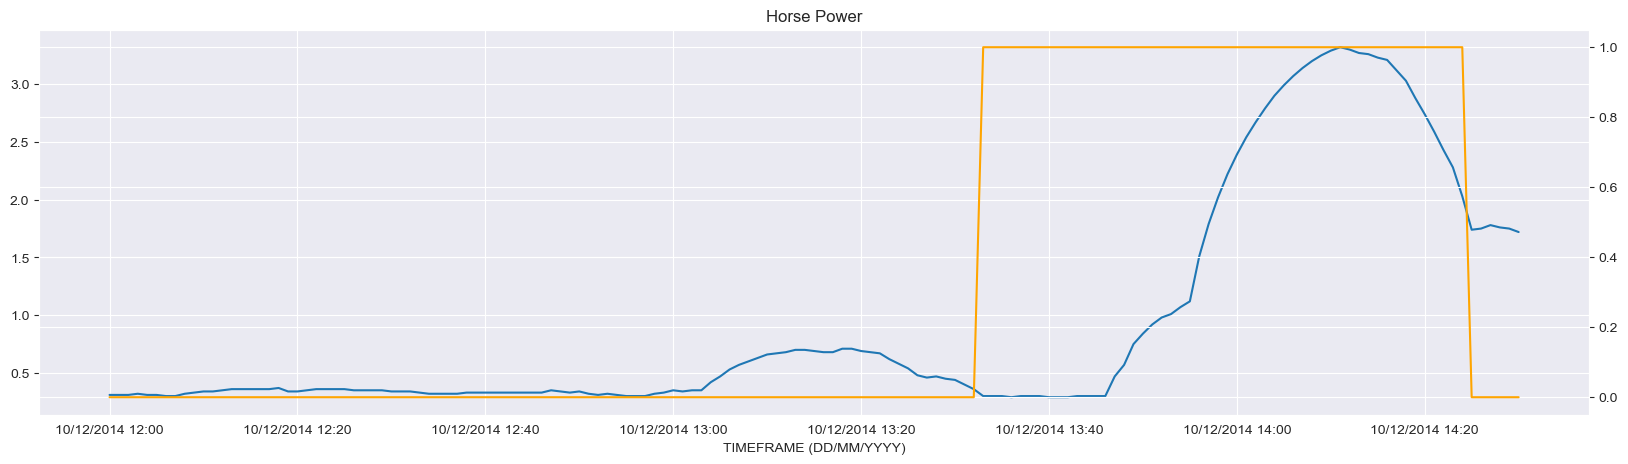

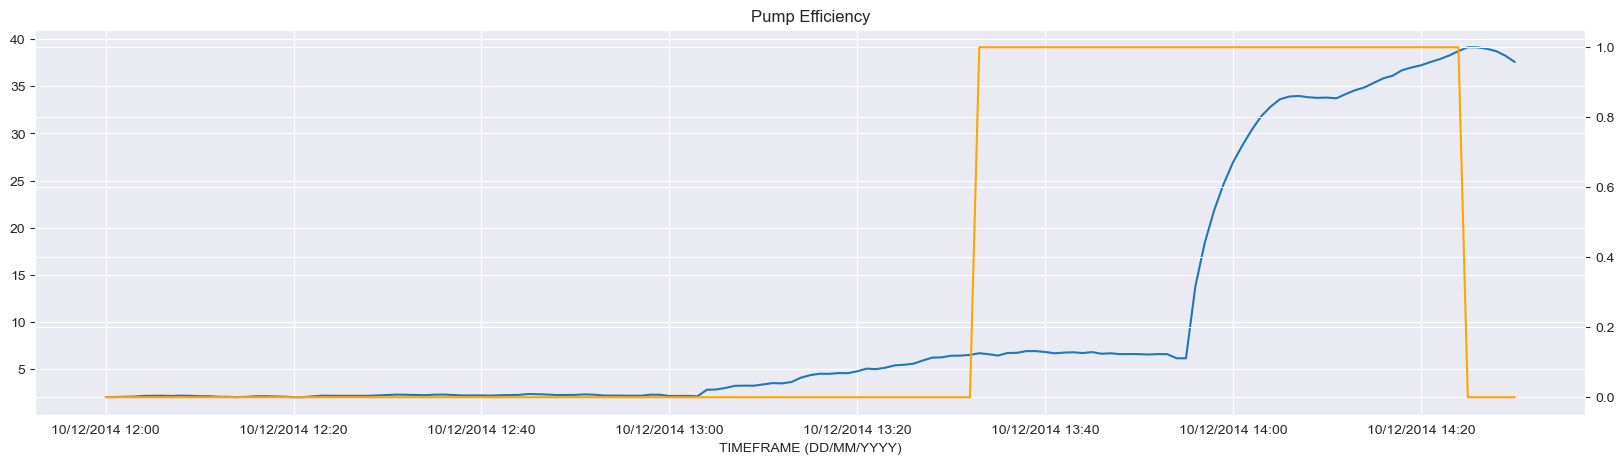

In [ ]:
dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)',inplace=True)
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= '10/12/2014 12:00') & (dataframe_stdev.index <= '10/12/2014 14:30')]
for item in ListOfVariables:
    ax1 = dataframe_time_filtered[item].plot()
    ax2 = ax1.twinx()
    ax2.plot(dataframe_time_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    plt.title(item)
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

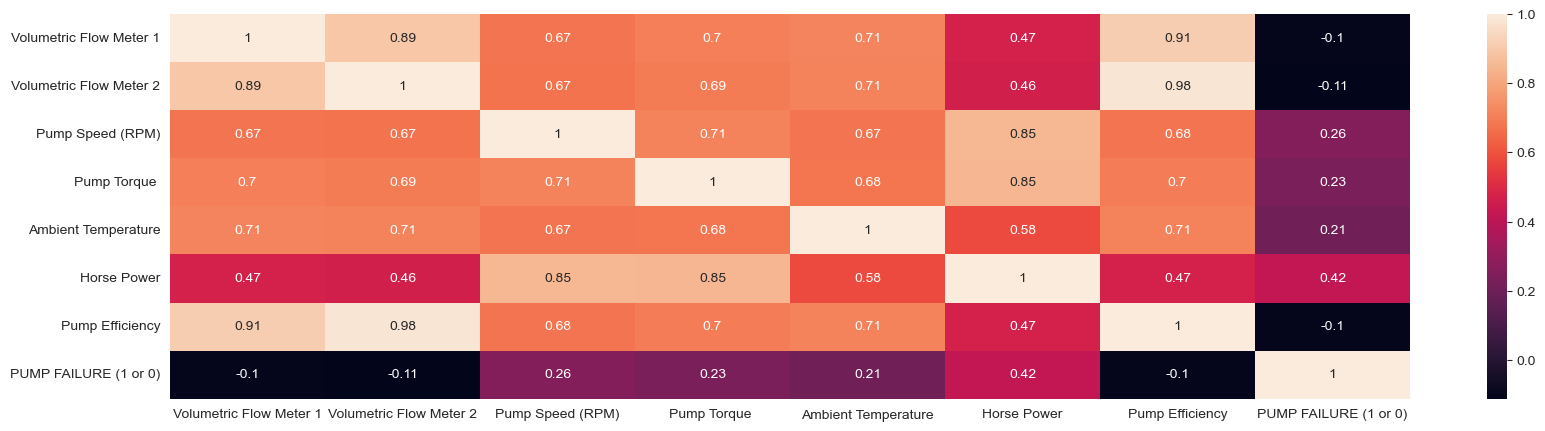

In [ ]:
corr_df_raw = dataframe_raw.corr(numeric_only=True)
sns.heatmap(corr_df_raw,annot=True)
plt.show()


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated DataFrame you created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>

In [ ]:
corr_df_raw

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


**Select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question**.

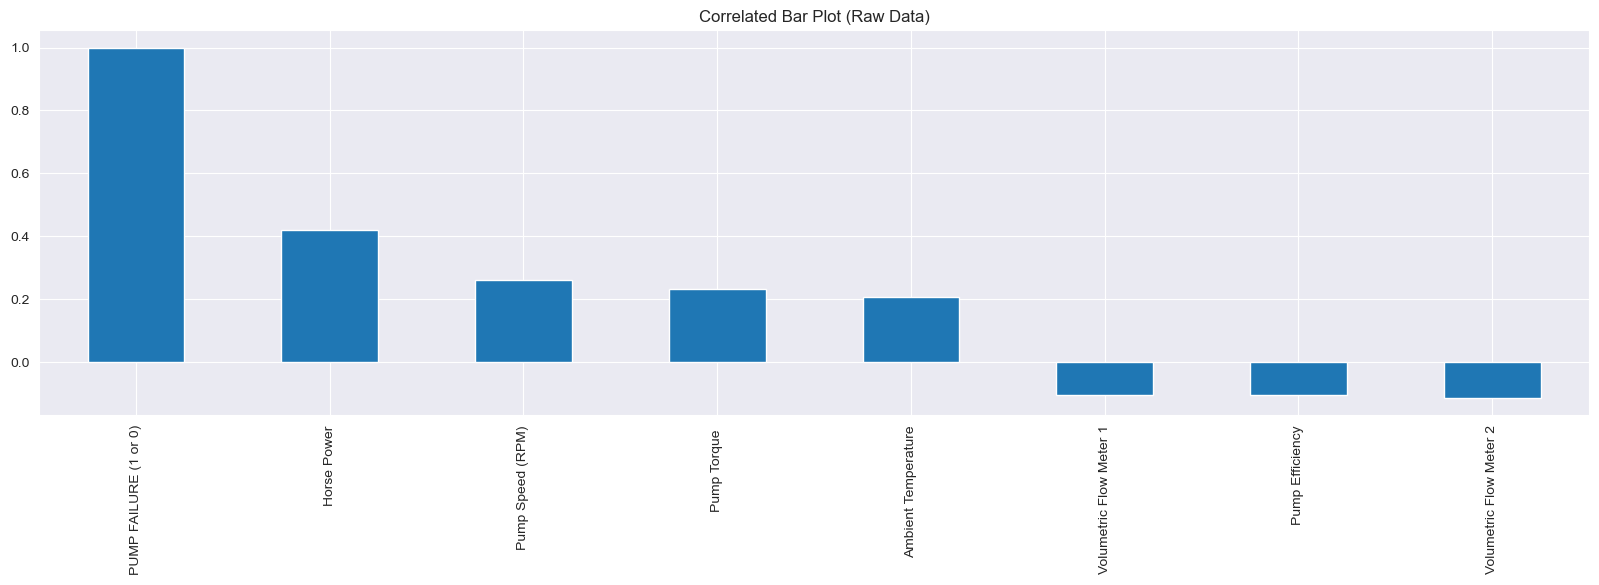

In [ ]:
corr_df_raw['PUMP FAILURE (1 or 0)'].sort_values(ascending=False).plot(kind='bar',title='Correlated Bar Plot (Raw Data)')
plt.show()

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 

<b> i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


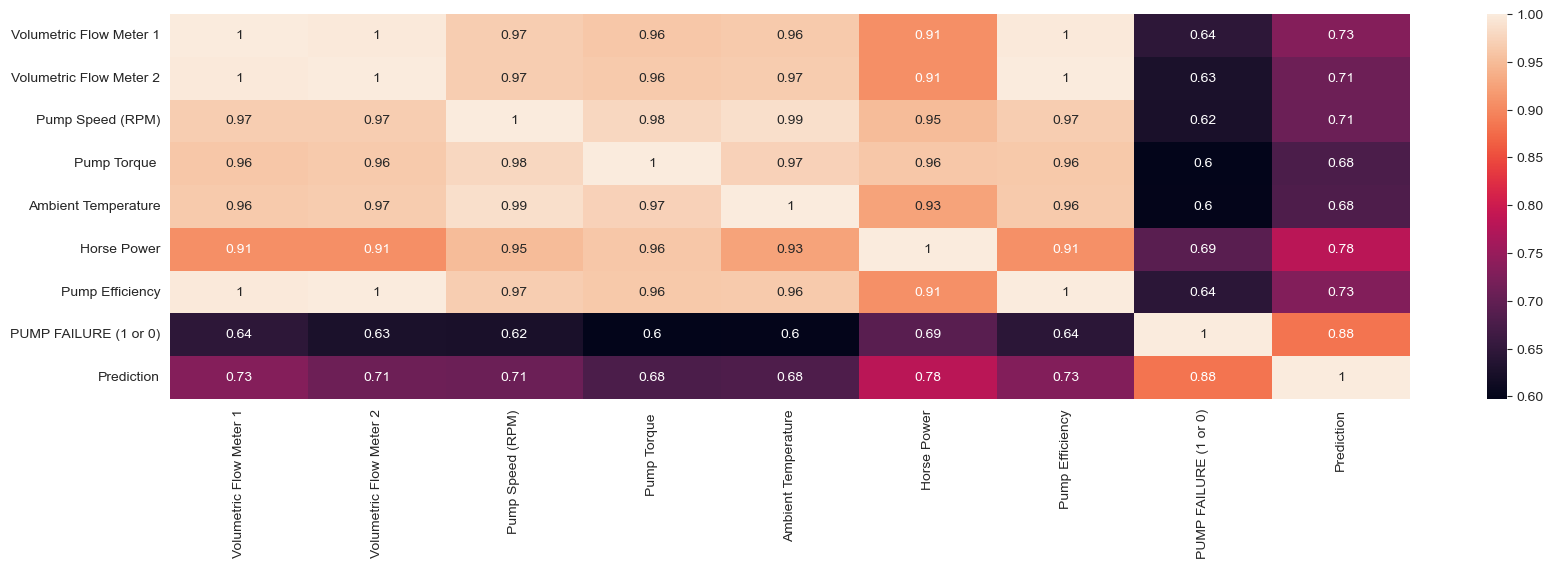

In [ ]:
corr_df_stdev = dataframe_stdev.corr(numeric_only=True)
sns.heatmap(corr_df_stdev,annot=True)
plt.show()

### Creating a Multivariate Regression Model


### Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:

<b> Don't forget to reimport the DataFrames you've previously imported in Step 2 before starting these steps </b> 

    1. Establish two DataFrames named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what you are trying to model. Dependent Variable on the other hand is the variable of interest that you want to MODEL. In this case, the Dependent Variable is Pump Failure (1 or 0).
    
    2. Add a constant to your Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to your dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


<b> ii) Repeat i) but this time use the dataframe_stdev you imported previously.</b>


In [ ]:
dependent_variable = dataframe_raw['PUMP FAILURE (1 or 0)']
independent_variables = dataframe_raw.drop(['PUMP FAILURE (1 or 0)','Data Source','TIMEFRAME (DD/MM/YYYY)'],axis=1)
independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variable,independent_variables).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Mon, 04 Dec 2023   Prob (F-statistic):          5.58e-233
Time:                           22:33:33   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dependent_variable = dataframe_stdev['PUMP FAILURE (1 or 0)']
independent_variables = dataframe_stdev.drop(['PUMP FAILURE (1 or 0)','Data Source'],axis=1)
independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variable,independent_variables).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                           22:33:33   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Compare the Models you've created and observe the R Squared displayed for each model.

### Step 14: <span style="color:purple">Analysis of Coefficients </span>

Using the model of best fit, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>

You can use params via the following syntax:

    model.params where model represents the name of the regression model you've created.


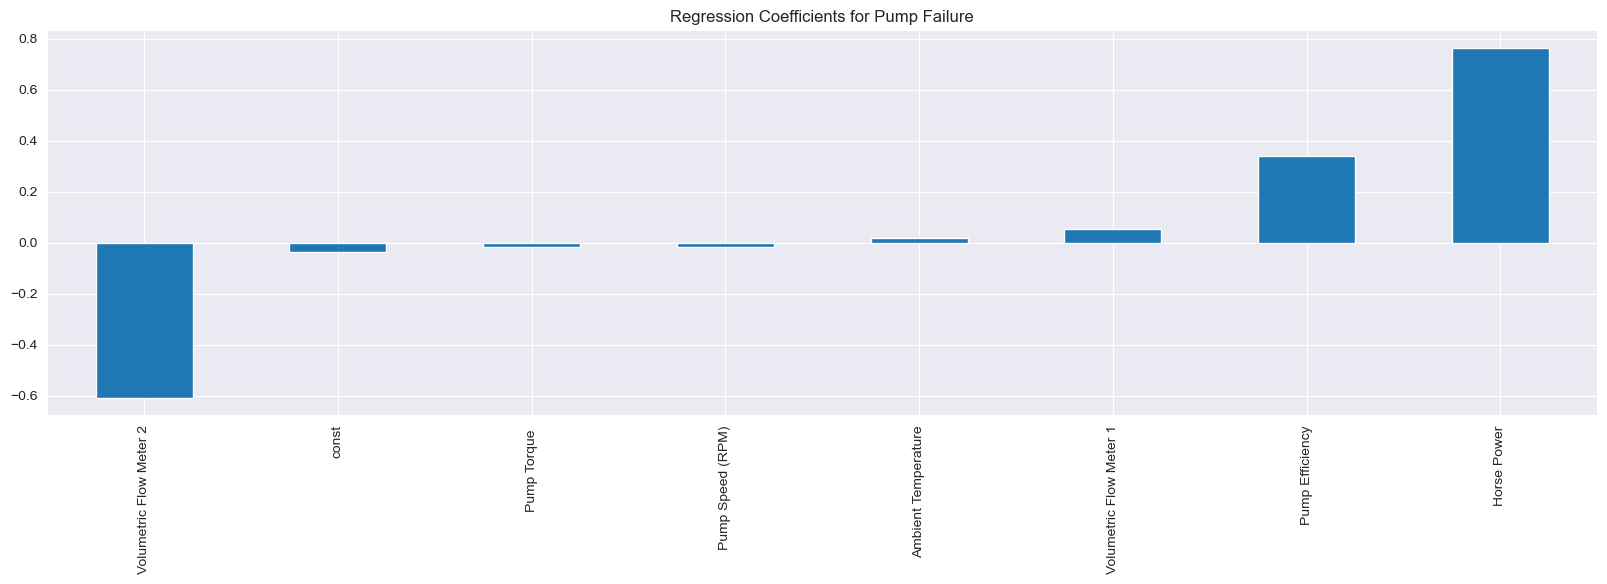

In [ ]:
regression_model.params.sort_values().plot(kind='bar',title='Regression Coefficients for Pump Failure')
plt.show()


### Step 15: <span style="color:purple">Validate Predictions</span> 
    
Once you've created a regressive_model, you can call this using the following syntax:

        regressive_model.predict(independent_variables). 
        
**i) Create a new column in the dataframe_stdev, called, 'Prediction'.**
    
**ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of your regressive predictions.**
    
**iii) Create a Dual-Axis Plot with the following axes items:** <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction


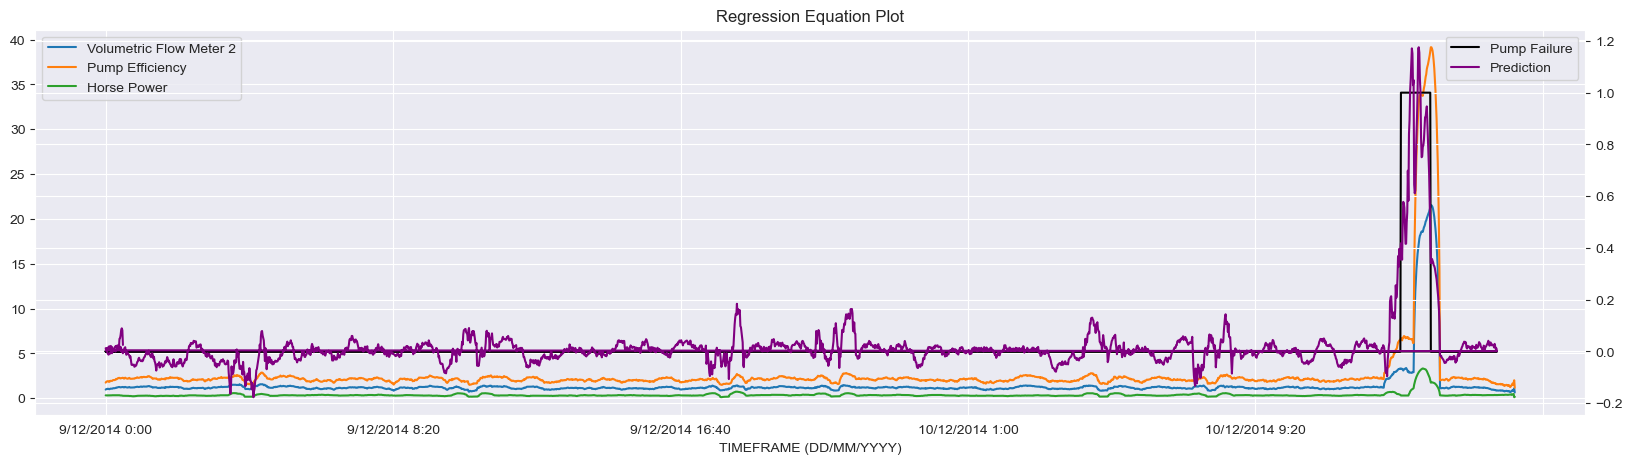

In [ ]:
dataframe_stdev['Prediction'] = regression_model.predict(independent_variables)
vars = ['Volumetric Flow Meter 2','Pump Efficiency','Horse Power']
ax1 = dataframe_stdev[vars].plot()
ax2 = ax1.twinx()
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'],color='black')
ax2.plot(dataframe_stdev['Prediction'],color='purple')
ax1.legend(loc='best')
ax2.legend(['Pump Failure','Prediction'])
plt.title('Regression Equation Plot')
plt.show()